## Your first CMD diagram

In this code, we will create and plot two CMD (Color-Magnitude Diagram) diagrams with the goal of visual representation and subsequent analysis. Unlike other codes, in this case, a certain level of stellar physics knowledge is assumed. The concepts involved are not very complicated, it is sufficient to be familiar with the Hertzsprung-Russell diagrams and concepts such as magnitude, star color, and their relationship with brightness and temperature (a quick read of their Wikipedia page is enough).

### Some context
A CMD diagram, also known as a color-magnitude diagram, is a plot that represents the relationship between the absolute magnitude (brightness) and the color of a set of stars. The difference from the typical H-R diagram is that CMDs are used to study **stellar clusters** and not individual stars.

For this example, we will create two synthetic CMDs using the IAC-Star webpage provided by the Instituto de Astrofisica de Canarias. We will work with two types of parameters: the star formation rate (SFR) and the initial mass function (IMF).
The former represents the rate of star creation at different ages of the Universe, while the latter allows us to describe the available mass for star formation based on exponents that reproduce a priority curve for the established mass.

Regarding the choice of these parameters, we must consider the type of system we want to create:

**Case 1**: We want a greater number of older stars, so we aim for earlier star formation. On the other hand, we seek to favor the formation of low to medium-mass stars.
In this regard, for the SFR, parameters have been chosen so that star formation occurs at 1 and 0.1 in 0 and 5 giga-years, respectively. For the IMF, mass intervals of 0.1, 1, and 50 solar masses have been defined for exponents of -1.2 and 2.5.
The numerical description of the IMF is given by the so-called Salpeter function. I won't delve too much into that as the goal is the creation of the code and its relation to the results.
Regarding **Case 2**, we aim for more recent star formation, thus highlighting younger stars. Additionally, we prioritize the creation of more massive stars than in the previous case. For this, stellar formation of 0.5 and 1.5 at 8 and 13 Gyrs, respectively, has been defined, while for the IMF, larger intervals of 1, 5, and 80 solar masses have been defined for exponents of -2 and -1.5.

The input for our data (according to the IAC page) is as follows:

**Case 1:**
SFR: 3, 0, 5, 13, 1, 0.1, 1.5
IMF: 3, 0.1, 1, 50, -2.0, -1.5

**Case 2:**
SFR: 3, 0, 8, 13, 0, 0.5, 1.5
IMF: 3, 1, 5, 80, -2.0, -1.5

Where the first number refers to the number of input data samples, the next 3 numbers correspond to the age and solar masses available for SFR and IMF, respectively, and finally, 0, 0.5, and 1.5 of SFR correspond to the star formation rate, and -2 and -1.5 to the Salpeter exponents (taking Case 2 as an example).

A simple way to better understand the parameters we are using is to represent them. To do this, we will use the following code created from the definitions of SFR and IMF available on the IAC-Star webpage.

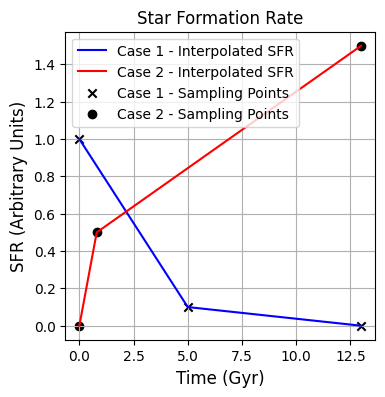

In [13]:
import matplotlib.pyplot as plt
import numpy as np

def interpolate_sfr(input_list, current_age):
    n = int(input_list[0])
    times = input_list[1:n+1]
    sfrs = input_list[n+1:]

    # Linear interpolation
    sfr_function = np.interp(current_age, times, sfrs)

    return sfr_function

# Case 1
input_list_1 = [3, 0, 5, 13, 1, 0.1, 0]

# Case 2
input_list_2 = [3, 0, 0.8, 13, 0, 0.5, 1.5]

# Extract n from the input_list
n_1 = int(input_list_1[0])
n_2 = int(input_list_2[0])

# Generate a range of ages for plotting
ages = np.linspace(0, 13, 1000)

# Interpolate SFR for each age for caso 1
sfr_values_1 = [interpolate_sfr(input_list_1, age) for age in ages]

# Interpolate SFR for each age for caso 2
sfr_values_2 = [interpolate_sfr(input_list_2, age) for age in ages]

# Plot the SFR for both casos
plt.figure(figsize=(4,4))
plt.plot(ages, sfr_values_1, label='Case 1 - Interpolated SFR', color='blue')
plt.plot(ages, sfr_values_2, label='Case 2 - Interpolated SFR', color='red')
plt.scatter(input_list_1[1:n_1+1], input_list_1[n_1+1:], color='black', label='Case 1 - Sampling Points', marker='x')
plt.scatter(input_list_2[1:n_2+1], input_list_2[n_2+1:], color='black', label='Case 2 - Sampling Points', marker='o')
plt.xlabel('Time (Gyr)', fontsize=12)
plt.ylabel('SFR (Arbitrary Units)', fontsize=12)
plt.title('Star Formation Rate')
plt.legend()
plt.grid(True)
plt.show()


From the previous representation, we can observe the difference in star formation between cases 1 and 2, where for a final value of 13 Gyrs, the ratio is 1.5 and 0, respectively. Therefore, we expect to see a significant difference.

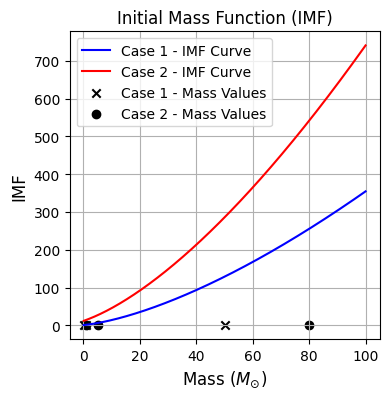

In [11]:
import matplotlib.pyplot as plt
import numpy as np

def calculate_imf(m_values, x_values):
    imf_curve = np.zeros(1000)

    for i in range(len(m_values) - 1):
        m_start, m_end = m_values[i], m_values[i + 1]
        x = x_values[i]

        # Generate a range of masses for the current interval
        masses = np.linspace(m_start, m_end, 1000)

        # Calculate the IMF for the current interval
        imf_interval = (masses ** (-x))

        # Add the calculated IMF to the overall curve
        imf_curve += imf_interval

    return imf_curve

# Example input for the initial mass function (IMF)

# Case 1
m_values_1 = [0.1, 1, 50]  # Mass values in solar units
x_values_1 = [-2.0, -1.5]  # Exponents for mass intervals

# Case 2
m_values_2 = [1, 5, 80]    # Mass values in solar units
x_values_2 = [-2.0, -1.5]  # Exponents for mass intervals

# Calculate the IMF curve for both cases
imf_curve_1 = calculate_imf(m_values_1, x_values_1)
imf_curve_2 = calculate_imf(m_values_2, x_values_2)

# Plot the IMF curves for both cases
plt.figure(figsize=(4,4))
plt.plot(np.linspace(0.1, 100, 1000), imf_curve_1, label='Case 1 - IMF Curve', color='blue')
plt.plot(np.linspace(0.1, 100, 1000), imf_curve_2, label='Case 2 - IMF Curve', color='red')
plt.scatter(m_values_1, [0] * len(m_values_1), color='black', label='Case 1 - Mass Values', marker='x')
plt.scatter(m_values_2, [0] * len(m_values_2), color='black', label='Case 2 - Mass Values', marker='o')
plt.xlabel(r'Mass ($M_{\odot}$)', fontsize=12)
plt.ylabel('IMF', fontsize=12)
plt.title('Initial Mass Function (IMF)')
plt.legend()
plt.grid(True)
plt.show()


From the previous representation, we can see that not only is the curve steeper in Case 2, but also the mass value points are higher. This results in an IMF much larger than in the first case.

Error processing line: Total star numbers: singles plus binaries: ever formed,   now alive, written to file; binaries only: ever formed, now alive, written to file

Error processing line: Total star numbers: singles plus binaries: ever formed,   now alive, written to file; binaries only: ever formed, now alive, written to file



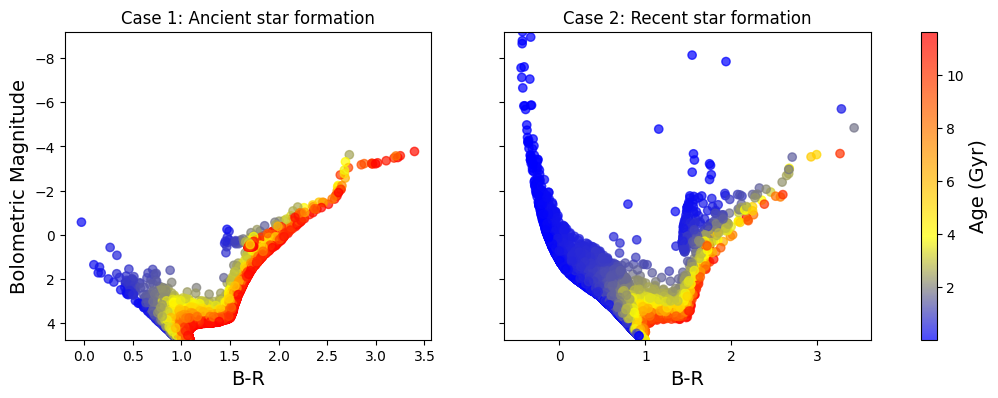

In [12]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

def read_data(file_path):
    with open(file_path, 'r') as file:
        # Read lines from the file
        lines = file.readlines()

    # Filter relevant lines
    data_lines = [line for line in lines if line.strip() and not line.startswith("#")]

    # Initialize lists to store data
    mag_R = []
    mag_B = []
    Age = []
    Mbol = []

    # Process the data
    for line in data_lines:
        entries = line.split()
        if len(entries) >= 20:
            try:
                mag_R.append(float(entries[17]))    # Magnitude R
                mag_B.append(float(entries[15]))    # Magnitude B
                Age.append(float(entries[10]) * 1e-9)  # Age + conversion to gigayears
                Mbol.append(float(entries[13]))     # Mbol
            except ValueError:
                print(f"Error processing line: {line}")

    # Calculate the B-R color
    color_BR = [b - r for b, r in zip(mag_B, mag_R)]

    return color_BR, Mbol, Age

# Read data from both files
color_BR_1, Mbol_1, Age_1 = read_data('/home/sergio/Escritorio/Master/Física de Galaxias/Tarea 2/Resultados simulación/cmd_8172')
color_BR_2, Mbol_2, Age_2 = read_data('/home/sergio/Escritorio/Master/Física de Galaxias/Tarea 2/Resultados simulación/cmd_8686')

# Create a custom color map for the CMD plot: red for older age, blue for younger age
colors = [(1, 0, 0), (1, 0.5, 0), (1, 1, 0), (0, 0, 1)]  # Red, Orange, Yellow, Blue
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=256)
custom_cmap = custom_cmap.reversed()

# Determine the y-axis range
y_min = min(min(Mbol_1), min(Mbol_2))
y_max = max(max(Mbol_1), max(Mbol_2))

# Create the CMD plot
fig, axs = plt.subplots(1, 2, figsize=(13, 4), sharey=True)

# Invert the y-axis limits
axs[1].set_ylim(y_max, y_min)
axs[0].set_ylim(y_max, y_min)

# Plot for old star formation (infile_1)
scatter_1 = axs[1].scatter(color_BR_1, Mbol_1, c=Age_1, cmap=custom_cmap, marker='o', alpha=0.7)
axs[1].set_title('Case 2: Recent star formation')
axs[1].set_xlabel('B-R', fontsize=14)

# Plot for recent star formation (infile_2)
scatter_2 = axs[0].scatter(color_BR_2, Mbol_2, c=Age_2, cmap=custom_cmap, marker='o', alpha=0.7)
axs[0].set_title('Case 1: Ancient star formation')
axs[0].set_xlabel('B-R', fontsize=14)
axs[0].set_ylabel('Bolometric Magnitude', fontsize=14)

# Color bar configuration
colorbar = fig.colorbar(scatter_1, ax=axs, orientation='vertical')
colorbar.set_label('Age (Gyr)', fontsize=14)

# Show the plot
plt.show()

We thus obtain the CMD diagrams for the studied cases, achieving the expected results with the choice of SFR and IMF parameters.

In the first case, we observe a much older stellar system due to the scarce or nonexistent recent star formation. This can be seen in the large number of points in red that have moved from the main sequence (that blue branch extending in the second photo) to the region of red giants at the so-called "turn-off point." Additionally, the majority of blue and massive stars have disappeared from the main sequence.

On the other hand, in the second case, we observe just the opposite—a main sequence filled with young, blue, and massive stars, along with a considerable reduction in the region of red giants. This is due to the very recent star formation, causing the more massive stars to still be young enough to remain in their main sequence phase.

In this way, with a simple representation code using matplotlib and data resulting from the simulation of synthetic star clusters provided by IAC-Star, we can create synthetic CMDs that allow us to obtain relevant information. Here, I have only varied two parameters, however, it is possible to change, for example, the metallicity of the stars, etc., so it may be interesting to vary a parameter individually and see how it affects the same CMD.